In [35]:
#https://www.kaggle.com/code/bavalpreet26/vgg-16-keras-nb3
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt

In [36]:
train_path = '/Users/inkyung/Desktop/IT_Projects/ttproject/ik_test/VGG16_data/노출trainset'
test_path = '/Users/inkyung/Desktop/IT_Projects/ttproject/ik_test/VGG16_data/노출testset'

In [37]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['노출', '비노출'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['노출', '비노출'], batch_size=10, shuffle=False)

Found 1060 images belonging to 2 classes.
Found 60 images belonging to 2 classes.


In [38]:
imgs, labels = next(train_batches)
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

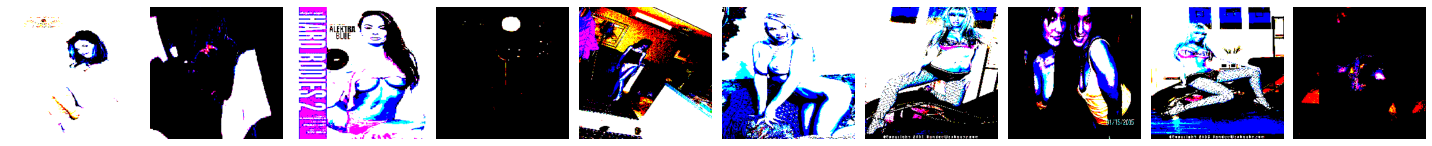

[[0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [39]:
plotImages(imgs)
print(labels)    

In [40]:
vgg16_model = tf.keras.applications.vgg16.VGG16()

In [41]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [26]:
model = Sequential()

for layer in vgg16_model.layers[:-1]:
    model.add(layer)
for layer in model.layers:
    layer.trainable = False

model.add(Dense(units=2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

In [43]:
type(vgg16_model)

keras.engine.functional.Functional

In [44]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(x = train_batches, 
          steps_per_epoch = len(train_batches),
          epochs = 5,
          verbose = 2
         )

Epoch 1/5


2023-05-15 13:57:10.843131: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]
2023-05-15 13:59:59.798342: W tensorflow/core/framework/op_kernel.cc:1818] UNKNOWN: OSError: image file is truncated (10 bytes not processed)
Traceback (most recent call last):

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anacond

UnknownError: Graph execution error:

OSError: image file is truncated (10 bytes not processed)
Traceback (most recent call last):

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/ops/script_ops.py", line 267, in __call__
    ret = func(*args)

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/autograph/impl/api.py", line 642, in wrapper
    return func(*args, **kwargs)

  File "/opt/anaconda3/lib/python3.9/site-packages/tensorflow/python/data/ops/from_generator_op.py", line 198, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 902, in wrapped_generator
    for data in generator_fn():

  File "/opt/anaconda3/lib/python3.9/site-packages/keras/engine/data_adapter.py", line 1049, in generator_fn
    yield x[i]

  File "/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py", line 116, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "/opt/anaconda3/lib/python3.9/site-packages/keras/preprocessing/image.py", line 370, in _get_batches_of_transformed_samples
    img = image_utils.load_img(

  File "/opt/anaconda3/lib/python3.9/site-packages/keras/utils/image_utils.py", line 479, in load_img
    img = img.resize(width_height_tuple, resample)

  File "/opt/anaconda3/lib/python3.9/site-packages/PIL/Image.py", line 1989, in resize
    self.load()

  File "/opt/anaconda3/lib/python3.9/site-packages/PIL/ImageFile.py", line 249, in load
    raise OSError(

OSError: image file is truncated (10 bytes not processed)


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_3810]

In [46]:
# 파일 손상 여부 확인

from PIL import Image
import os

# 이미지 파일들이 있는 디렉토리 경로
dir_path = '/Users/inkyung/Desktop/IT_Projects/ttproject/ik_test/VGG16_data/노출trainset/노출'

# 디렉토리 내 모든 이미지 파일 경로 리스트 생성
file_list = os.listdir(dir_path)
image_paths = [os.path.join(dir_path, file_name) for file_name in file_list if file_name.endswith(".jpg") or file_name.endswith(".JPG")]

# 모든 이미지 파일 확인
for path in image_paths:
    with Image.open(path) as im:
        try:
            im.verify()
            #print(f"{path} : 이미지 파일이 정상입니다.")
        except Exception as e:
            print(f"{path} : 이미지 파일이 손상되었습니다. {e}")
